In [141]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Data:

In [159]:
emc = 3200
A = 0.128
omega = 9810
eta_motor = 0.8
hPG = 1

In [167]:
N = np.array([1732,1725,1715,1723,1733,1738])       #RPM
Pd = np.array([0,0.05,0.1,0.15,0.25,0.3])           #Discharge pressure  kg/cm2
Ps = np.array([140,120,100,90,30,20])               #Suction pressure    mmHg
R2 = np.array([46.5,42.5,38.5,36.5,30.5,25.3])      #Final height
R1 = np.array([20,20,20,20,20,20])                  #Initial height
t = np.array([20,20,20,20,20,20])                   #time (discharge)
P = np.array([6,6,6,6,6,6])                         #pulses 
tp = np.array([21,22,23.1,23.8,25,26.7])            #Time for pulses 

### Observations:

In [168]:
otab = pd.DataFrame({'N':N,'Pd':Pd,'Ps':Ps,'R1':R1,'R2':R2,'t':t,'P':P,'tp':tp})
print(otab)

      N    Pd   Ps  R1    R2   t  P    tp
0  1732  0.00  140  20  46.5  20  6  21.0
1  1725  0.05  120  20  42.5  20  6  22.0
2  1715  0.10  100  20  38.5  20  6  23.1
3  1723  0.15   90  20  36.5  20  6  23.8
4  1733  0.25   30  20  30.5  20  6  25.0
5  1738  0.30   20  20  25.3  20  6  26.7


In [173]:
Pip = P*3600/(tp*emc)
Psh = Pip*eta_motor
R = (R2-R1)/100
Q = A*R/t
H = (10*(Pd + (Ps/760)))+ hPG
Pop = omega*Q*H/1000
eta_o = (Pop/Pip)*100
eta_p = (Pop/Psh)*100

### Calculations:

In [174]:
calc = pd.DataFrame({'Q':Q,'H':H,'Pip':Pip,'Psh':Psh,'Pop':Pop,'eta_p':eta_p,'eta_o':eta_o})
print(calc)

          Q         H       Pip       Psh       Pop      eta_p      eta_o
0  0.001696  2.842105  0.321429  0.257143  0.047286  18.389103  14.711283
1  0.001440  3.078947  0.306818  0.245455  0.043494  17.719958  14.175966
2  0.001184  3.315789  0.292208  0.233766  0.038513  16.475017  13.180014
3  0.001056  3.684211  0.283613  0.226891  0.038166  16.821339  13.457071
4  0.000672  3.894737  0.270000  0.216000  0.025675  11.886737   9.509389
5  0.000339  4.263158  0.252809  0.202247  0.014186   7.014129   5.611303


### Graph:

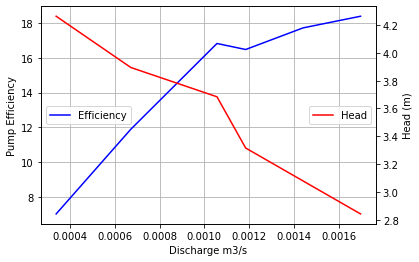

In [175]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Discharge m3/s')
ax1.set_ylabel('Pump Efficiency')
ax1.plot(Q,eta_p,'b',label='Efficiency')
ax1.legend(loc='center left')
plt.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Head (m)')
ax2.plot(Q,H,'r',label='Head')
ax2.legend(loc='center right')
plt.show()